# Train Neural Network with Augmentations

100%|██████████| 26421880/26421880 [00:06<00:00, 3983551.29it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 181664.46it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3233788.01it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19611514.07it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Augmented Image:


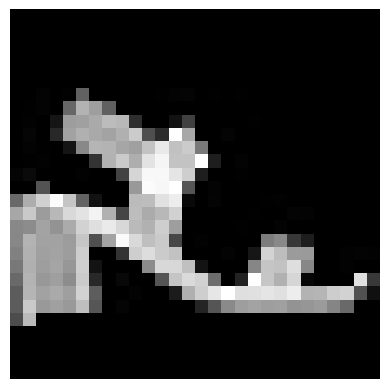

Label: Sandal
Original Test Image:


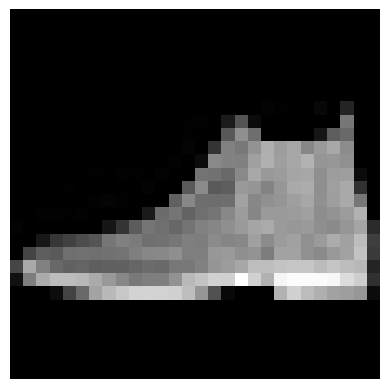

Label: Ankle boot
Batch of Augmented Images:


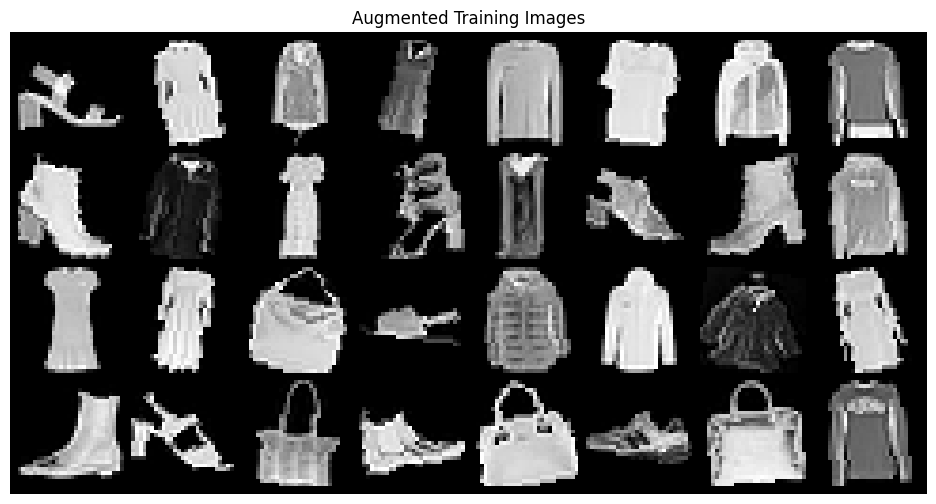

Labels: Sandal Dress Coat T-shirt/top Pullover T-shirt/top Coat Pullover Ankle boot Coat Dress Sandal Dress Sandal Ankle boot Pullover Dress Dress Bag Sandal Coat Coat Coat Dress Ankle boot Sandal Bag Ankle boot Bag Sneaker Bag Pullover
Batch of Original Test Images:


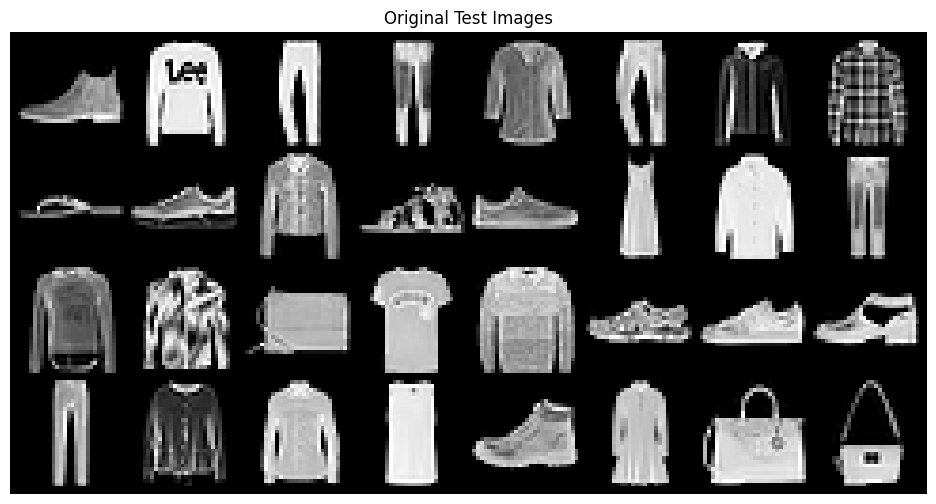

Labels: Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt Sandal Sneaker Coat Sandal Sneaker Dress Coat Trouser Pullover Coat Bag T-shirt/top Pullover Sandal Sneaker Ankle boot Trouser Coat Shirt T-shirt/top Ankle boot Dress Bag Bag
Epoch [1/10], Training Loss: 0.9730, Validation Loss: 0.6214
Epoch [2/10], Training Loss: 0.7574, Validation Loss: 0.5806
Epoch [3/10], Training Loss: 0.7141, Validation Loss: 0.5746
Epoch [4/10], Training Loss: 0.7013, Validation Loss: 0.5451
Epoch [5/10], Training Loss: 0.6897, Validation Loss: 0.5440
Epoch [6/10], Training Loss: 0.6799, Validation Loss: 0.5271
Epoch [7/10], Training Loss: 0.6724, Validation Loss: 0.5199
Epoch [8/10], Training Loss: 0.6714, Validation Loss: 0.5463
Epoch [9/10], Training Loss: 0.6708, Validation Loss: 0.5148
Epoch [10/10], Training Loss: 0.6683, Validation Loss: 0.5248


<ipython-input-1-bcd0e210193b>:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('best_model.pth'))


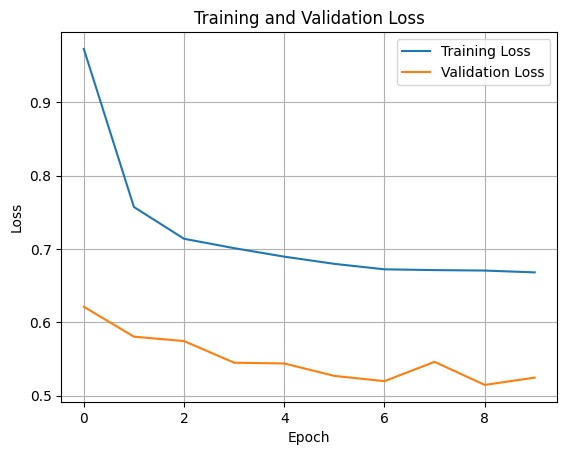

Overall Accuracy on the test set: 80.78%

Accuracy of T-shirt/top: 85.00%
Accuracy of    Trouser: 93.60%
Accuracy of   Pullover: 70.00%
Accuracy of      Dress: 89.20%
Accuracy of       Coat: 79.50%
Accuracy of     Sandal: 81.30%
Accuracy of      Shirt: 34.30%
Accuracy of    Sneaker: 86.80%
Accuracy of        Bag: 93.90%
Accuracy of Ankle boot: 94.20%


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Import, Preparation, and Preprocessing with Data Augmentation

# Define transformations for the training set (with data augmentation)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Define transformations for the test set (without data augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Download and load the training data with augmentation
trainset = torchvision.datasets.FashionMNIST(
    root='./data',        # Directory to store the dataset
    train=True,           # Specifies training set
    download=True,        # Downloads the dataset if not already present
    transform=train_transform   # Applies the transformations
)
trainloader = torch.utils.data.DataLoader(
    trainset,             # Dataset to load
    batch_size=64,        # Number of samples per batch
    shuffle=True          # Shuffle the data at every epoch
)

# Download and load the testing data (no augmentation)
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,          # Specifies test set
    download=True,
    transform=test_transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False         # No need to shuffle test data
)

# 2. Understanding the Data
# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show one augmented image
print('Augmented Image:')
imshow(images[0])
print('Label:', classes[labels[0]])

# Get some random test images (without augmentation)
test_dataiter = iter(testloader)
test_images, test_labels = next(test_dataiter)

# Show one original test image
print('Original Test Image:')
imshow(test_images[0])
print('Label:', classes[test_labels[0]])

# 3. Visualizing Augmented Images

# Function to display a batch of images
def imshow_batch(img_batch, labels_batch, title):
    img_batch = img_batch / 2 + 0.5  # Unnormalize
    npimg = torchvision.utils.make_grid(img_batch, nrow=8)
    npimg = npimg.numpy()
    plt.figure(figsize=(12, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze())
    plt.title(title)
    plt.axis('off')
    plt.show()
    # Print labels
    print('Labels:', ' '.join(f'{classes[labels_batch[j]]}' for j in range(len(labels_batch))))

# Display a batch of augmented images
print('Batch of Augmented Images:')
imshow_batch(images[:32], labels[:32], 'Augmented Training Images')

# Display a batch of original test images
print('Batch of Original Test Images:')
imshow_batch(test_images[:32], test_labels[:32], 'Original Test Images')

# 4. Defining the Neural Network with Dropout

class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 10)  # 10 output classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the images
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.dropout3(self.relu3(self.fc3(x)))
        x = self.fc4(x)  # Output layer (no activation, will use CrossEntropyLoss)
        return x

# Initialize the network with dropout
net = NetWithDropout()

# 5. Choosing Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)

# 6. Training Parameters and Variables

num_epochs = 10
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 3  # Early stopping patience
trigger_times = 0

# 7. Training Loop with Early Stopping

for epoch in range(num_epochs):
    net.train()  # Set the model to training mode
    running_train_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()          # Zero the parameter gradients
        outputs = net(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights
        running_train_loss += loss.item()
    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    val_loss = running_val_loss / len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        # Save the model checkpoint
        torch.save(net.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

# 8. Loading the Best Model

net.load_state_dict(torch.load('best_model.pth'))

# 9. Plotting the Losses

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluating the Final Model

def evaluate_network():
    net.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    print(f'Overall Accuracy on the test set: {100 * correct / total:.2f}%\n')
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network()


# Train CNN with Augmentations

Augmented Image:


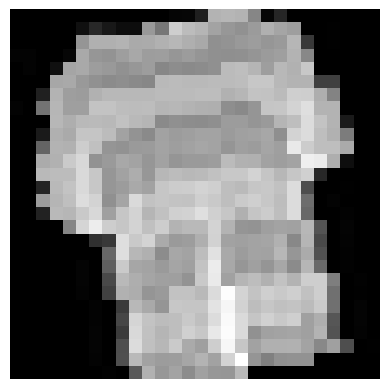

Label: T-shirt/top
Original Test Image:


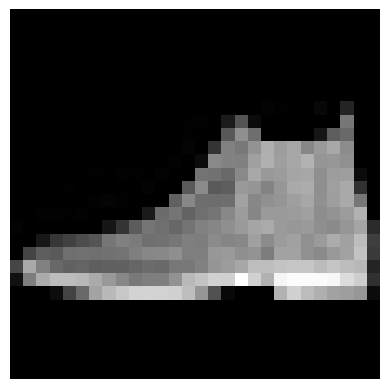

Label: Ankle boot
Batch of Augmented Images:


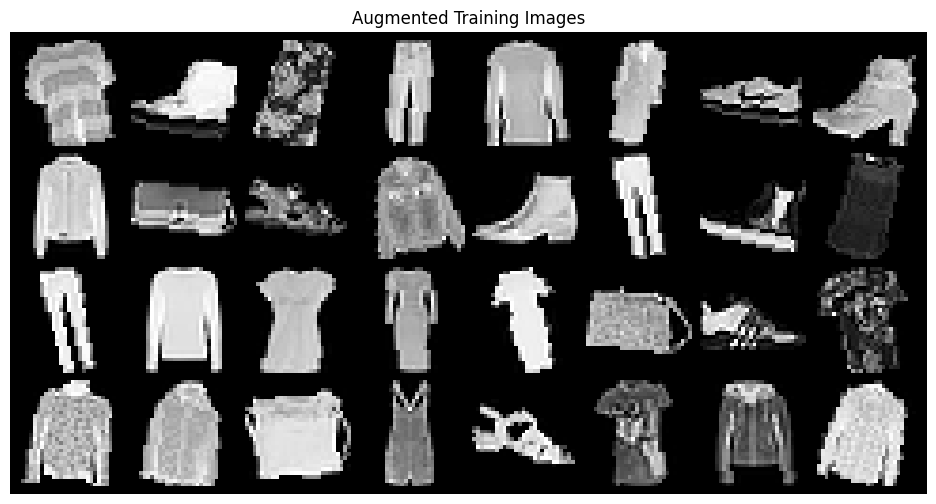

Labels: T-shirt/top Sneaker Shirt Trouser Pullover Coat Sneaker Ankle boot Coat Bag Sandal Coat Ankle boot Trouser Ankle boot Shirt Trouser Pullover T-shirt/top Dress Dress Bag Sneaker T-shirt/top Coat Coat Bag Trouser Sandal T-shirt/top Coat Shirt
Batch of Original Test Images:


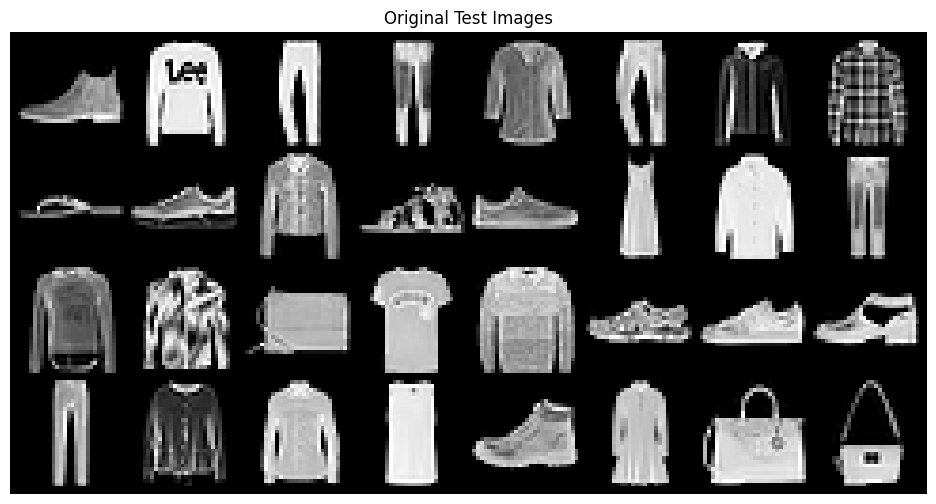

Labels: Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt Sandal Sneaker Coat Sandal Sneaker Dress Coat Trouser Pullover Coat Bag T-shirt/top Pullover Sandal Sneaker Ankle boot Trouser Coat Shirt T-shirt/top Ankle boot Dress Bag Bag
Epoch [1/5], Training Loss: 0.7014, Validation Loss: 0.4506
Epoch [2/5], Training Loss: 0.5260, Validation Loss: 0.3918
Epoch [3/5], Training Loss: 0.4701, Validation Loss: 0.3474
Epoch [4/5], Training Loss: 0.4435, Validation Loss: 0.3365
Epoch [5/5], Training Loss: 0.4271, Validation Loss: 0.3359


<ipython-input-3-5d53296eec87>:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('best_model.pth'))


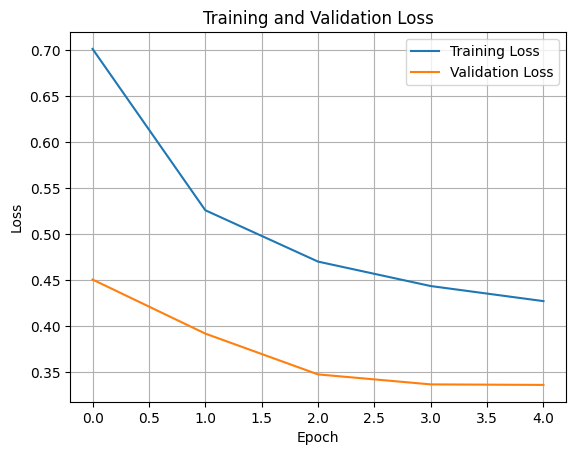

Overall Accuracy on the test set: 87.45%

Accuracy of T-shirt/top: 89.50%
Accuracy of    Trouser: 97.80%
Accuracy of   Pullover: 81.20%
Accuracy of      Dress: 91.00%
Accuracy of       Coat: 87.90%
Accuracy of     Sandal: 97.30%
Accuracy of      Shirt: 48.50%
Accuracy of    Sneaker: 88.70%
Accuracy of        Bag: 95.30%
Accuracy of Ankle boot: 97.30%


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Import, Preparation, and Preprocessing with Data Augmentation

# Define transformations for the training set (with data augmentation)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Define transformations for the test set (without data augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Download and load the training data with augmentation
trainset = torchvision.datasets.FashionMNIST(
    root='./data',        # Directory to store the dataset
    train=True,           # Specifies training set
    download=True,        # Downloads the dataset if not already present
    transform=train_transform   # Applies the transformations
)
trainloader = torch.utils.data.DataLoader(
    trainset,             # Dataset to load
    batch_size=64,        # Number of samples per batch
    shuffle=True          # Shuffle the data at every epoch
)

# Download and load the testing data (no augmentation)
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,          # Specifies test set
    download=True,
    transform=test_transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False         # No need to shuffle test data
)

# 2. Understanding the Data
# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show one augmented image
print('Augmented Image:')
imshow(images[0])
print('Label:', classes[labels[0]])

# Get some random test images (without augmentation)
test_dataiter = iter(testloader)
test_images, test_labels = next(test_dataiter)

# Show one original test image
print('Original Test Image:')
imshow(test_images[0])
print('Label:', classes[test_labels[0]])

# 3. Visualizing Augmented Images

# Function to display a batch of images
def imshow_batch(img_batch, labels_batch, title):
    img_batch = img_batch / 2 + 0.5  # Unnormalize
    npimg = torchvision.utils.make_grid(img_batch, nrow=8)
    npimg = npimg.numpy()
    plt.figure(figsize=(12, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze())
    plt.title(title)
    plt.axis('off')
    plt.show()
    # Print labels
    print('Labels:', ' '.join(f'{classes[labels_batch[j]]}' for j in range(len(labels_batch))))

# Display a batch of augmented images
print('Batch of Augmented Images:')
imshow_batch(images[:32], labels[:32], 'Augmented Training Images')

# Display a batch of original test images
print('Batch of Original Test Images:')
imshow_batch(test_images[:32], test_labels[:32], 'Original Test Images')

# 4. Defining the Convolutional Neural Network with Dropout

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout layers
        self.dropout_conv = nn.Dropout2d(0.25)
        self.dropout_fc = nn.Dropout(0.5)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)  # [batch_size, 32, 14, 14]
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # [batch_size, 64, 7, 7]
        x = self.dropout_conv(x)
        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x

# Initialize the network
net = CNNNet()

# 5. Choosing Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)

# 6. Training Parameters and Variables

num_epochs = 5
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 3  # Early stopping patience
trigger_times = 0

# 7. Training Loop with Early Stopping

for epoch in range(num_epochs):
    net.train()  # Set the model to training mode
    running_train_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()          # Zero the parameter gradients
        outputs = net(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights
        running_train_loss += loss.item()
    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    val_loss = running_val_loss / len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        # Save the model checkpoint
        torch.save(net.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

# 8. Loading the Best Model

net.load_state_dict(torch.load('best_model.pth'))

# 9. Plotting the Losses

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 10. Evaluating the Final Model

def evaluate_network():
    net.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    print(f'Overall Accuracy on the test set: {100 * correct / total:.2f}%\n')
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network()


# Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="https://i.postimg.cc/QCmC0vhZ/cnn2.jpg"
     alt="cnn2.jpg"
     style="width: 400px;" />


### Why another type of Networks?
Problem with Multilayer Perceptrons(MLP's)
<img src="https://i.postimg.cc/52T07Bdy/cnn.jpg"
     alt="nn.jpg"
     style="width: 400px;" />

- **Overfitting** due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!


<img src="https://i.postimg.cc/X7vYnHnX/invariance.png"
     alt="pokemon_back.jpg"
     style="width: 400px;" />
        

### Why CNN's are special?

Let's have a look out this image!
<img src="https://i.postimg.cc/KzYH1Mj7/cat.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

CNN know's this is a cat.
<img src="https://i.postimg.cc/4dFFVxHD/cat1.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

Even this is a cat.
<img src="https://i.postimg.cc/C5BrNpjz/cat2.jpg"
     alt="cat.jpg"
     style="width: 400px;" />
This a cat too.
<img src="https://i.postimg.cc/LsDW4T96/cat3.jpg"
     alt="cat.jpg"
     style="width: 400px;" />
and this too!
<img src="https://i.postimg.cc/dV8XpFgC/cat4.jpg"
     alt="cat.jpg"
     style="width: 400px;" />


## Some image processing

In [ ]:
img_path = '/content/car1.jpeg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [ ]:
car1 = mpimg.imread(img_path)

In [ ]:
car1.shape

(168, 300, 3)

In [ ]:
type(car1)

numpy.ndarray

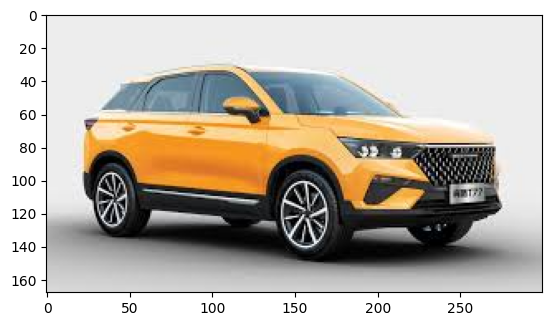

In [ ]:
plt.imshow(car1)

In [ ]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [ ]:
car1_cv2 = cv2.imread(img_path)

In [ ]:
cv2.imshow("image", car1_cv2) # Will work only in local pc

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


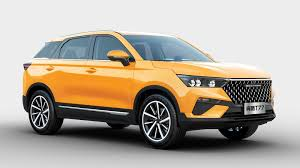

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2)

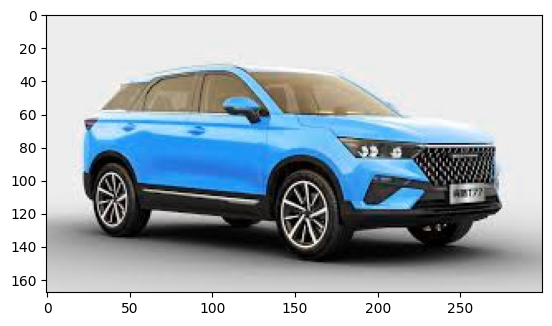

In [ ]:
plt.imshow(car1_cv2) # cv2 reads images as BGR and in matplotlib reads as RGB

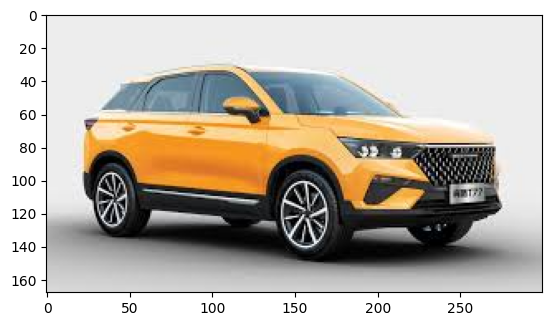

In [ ]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

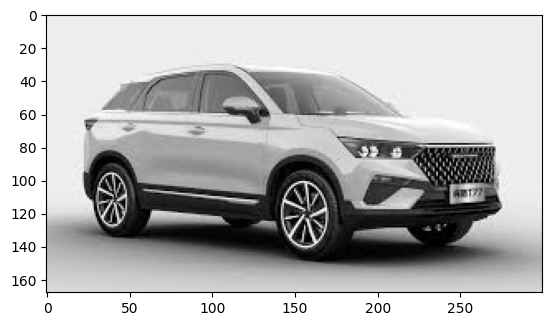

In [ ]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [ ]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [ ]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

## understanding composition of colored images

In [ ]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))


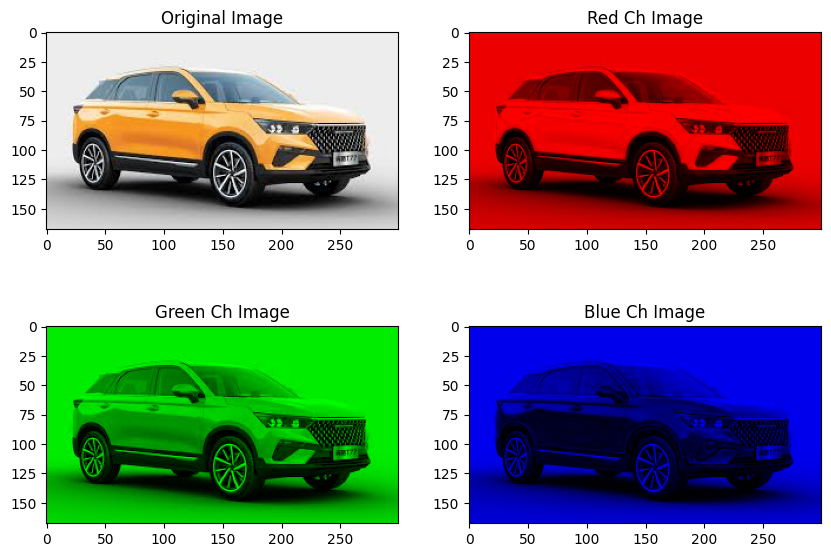

In [ ]:
viusalize_RGB_channel(imgArray=car1_cv2)

In [ ]:
random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img.shape

(6, 6, 3)

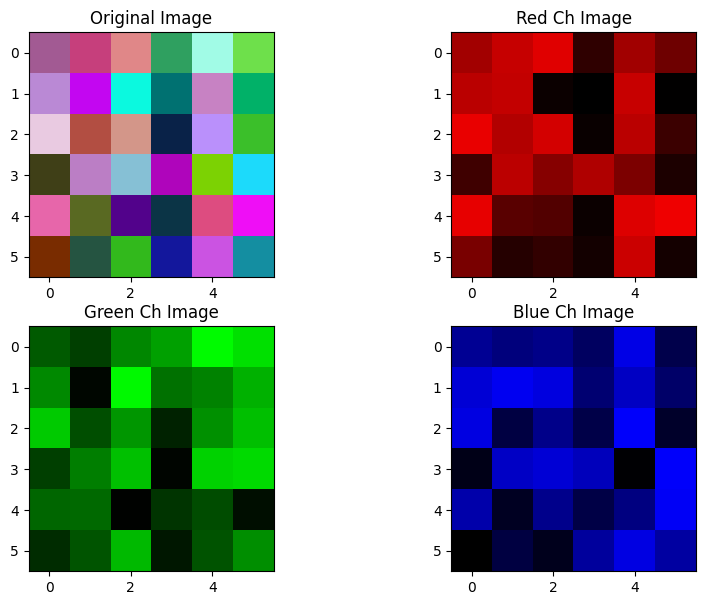

In [ ]:
viusalize_RGB_channel(imgArray=random_colored_img)

## understanding filters

In [ ]:
sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [ ]:
print("highlighting Horizontal edges:\n", sobel.T)


highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [ ]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

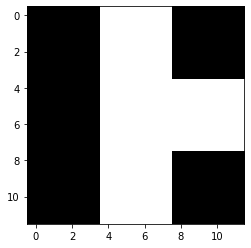

In [ ]:
plt.imshow(example1, cmap="gray")

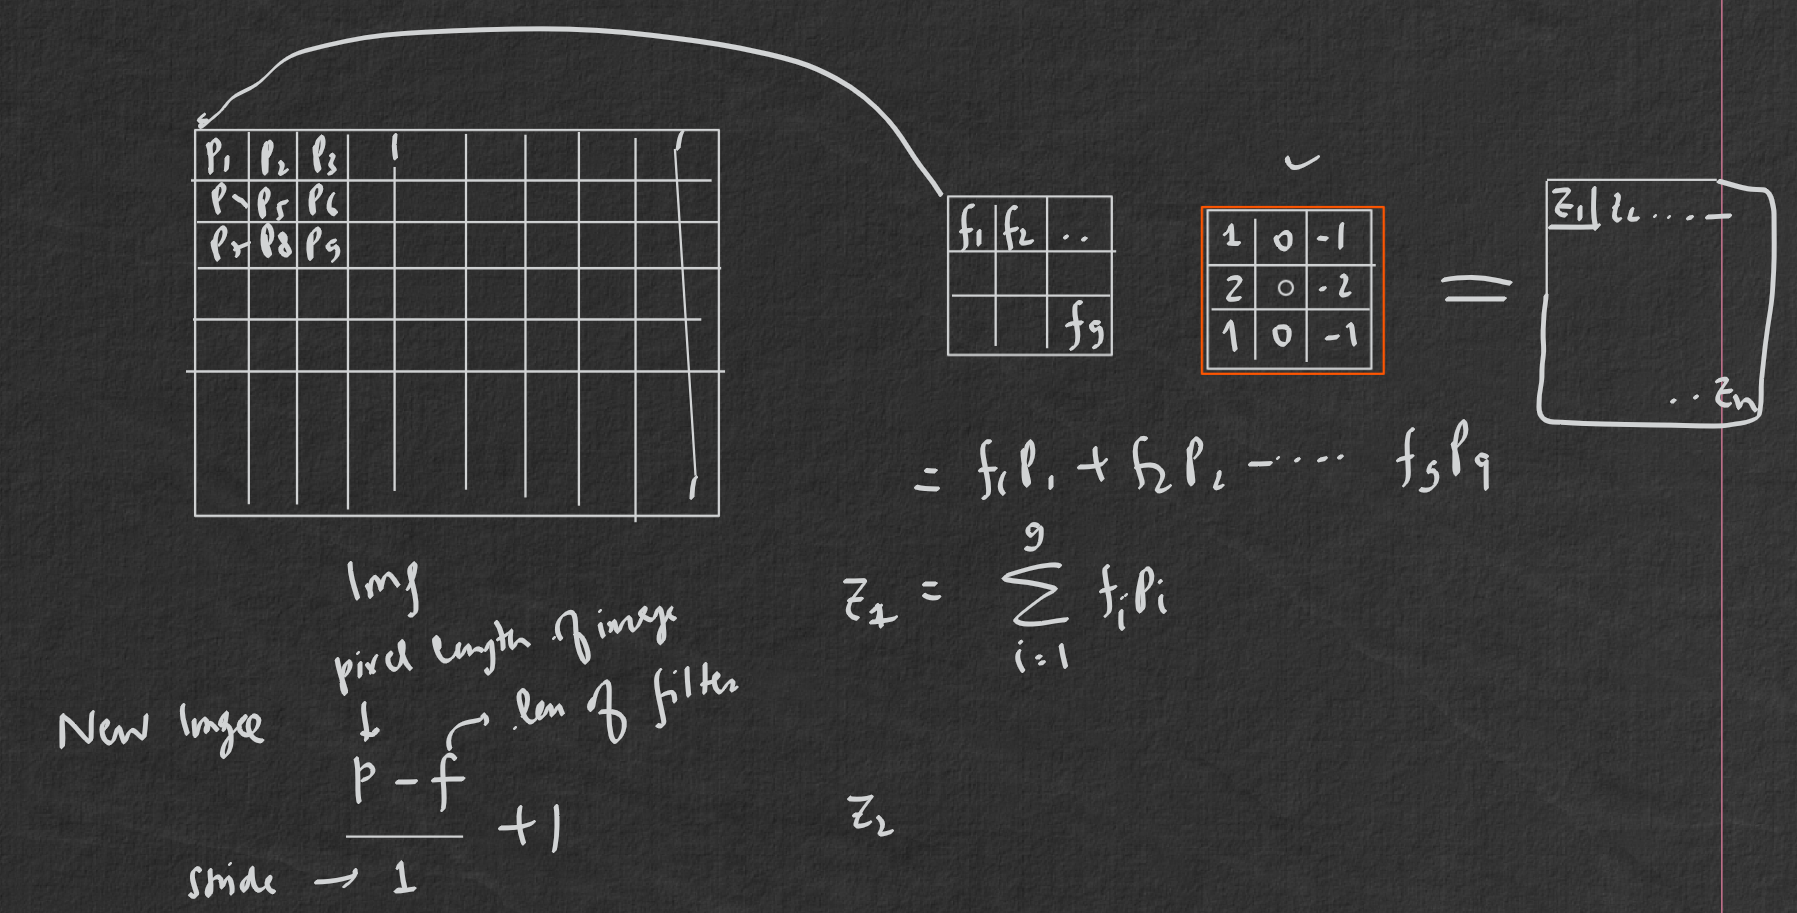

In [ ]:
def simple_conv(imgFilter=None, picture=None):
  # extract the shape of the image
  p_row, p_col = picture.shape

  k = imgFilter.shape[0] # k =3

  temp = list()

  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)

  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  return resulant_image

In [ ]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [ ]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [ ]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [ ]:
sum(sum(target_area*sobel))

-1020

In [ ]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

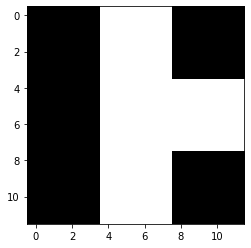

In [ ]:
plt.imshow(example1, cmap="gray")

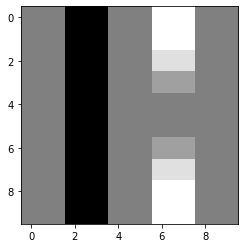

In [ ]:
plt.imshow(result, cmap="gray")

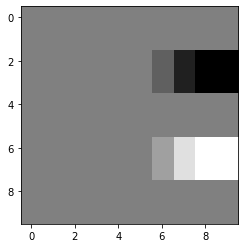

In [ ]:
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

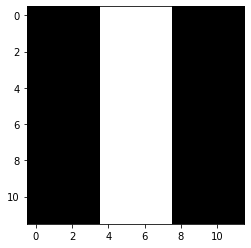

In [ ]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

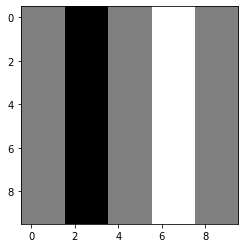

In [ ]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

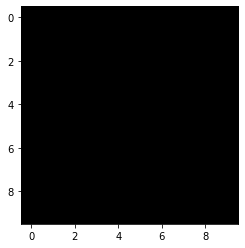

In [ ]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

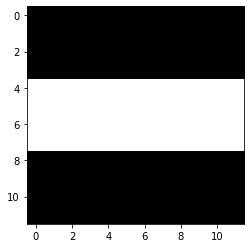

In [ ]:

example2_T = np.array(example2.T)
plt.imshow(example2_T, cmap="gray")

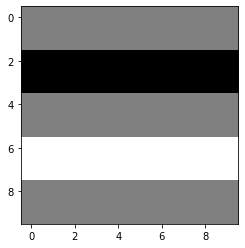

In [ ]:
result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

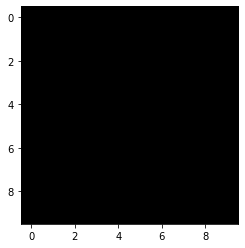

In [ ]:
result = simple_conv(imgFilter=sobel, picture=example2_T)
plt.imshow(result, cmap="gray")

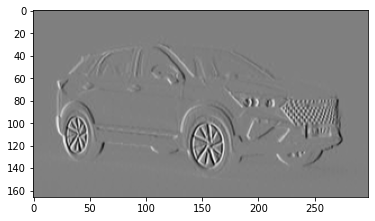

In [ ]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

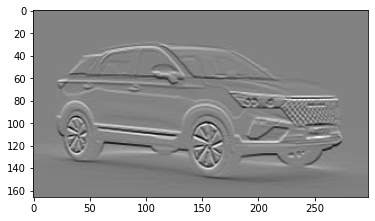

In [ ]:
result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [ ]:
car1_cv2_BGR_GRAY.shape

(168, 300)

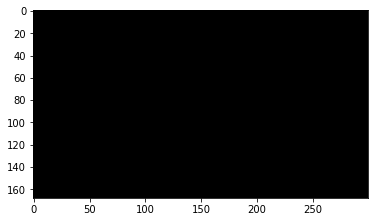

In [ ]:
nothing = np.zeros(car1_cv2_BGR_GRAY.shape)
plt.imshow(nothing, cmap="gray")

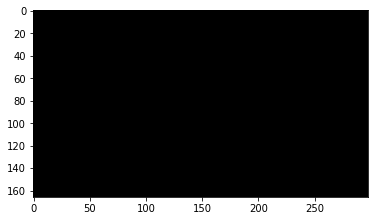

In [ ]:
result = simple_conv(imgFilter=sobel.T, picture=nothing)
plt.imshow(result, cmap="gray")

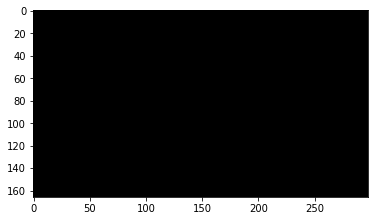

In [ ]:
result = simple_conv(imgFilter=sobel, picture=nothing)
plt.imshow(result, cmap="gray")

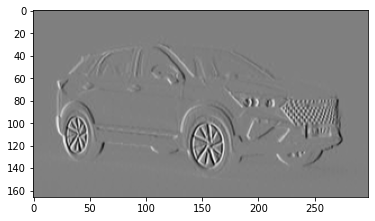

In [ ]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [ ]:
random_f = np.random.randn(3,3)
random_f

array([[ 0.02350868,  0.84606421,  2.128325  ],
       [ 1.1103266 ,  0.07082128, -0.08849125],
       [ 2.61532655, -0.70888593, -2.1932879 ]])

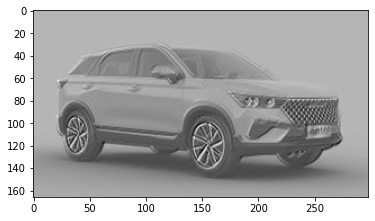

In [ ]:
result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")